### Unsupervised Learning Approach: Clustering

As part of the exploratory analysis, I applied **unsupervised machine learning** to uncover hidden patterns and structure within the clinical dataset, independent of the heart attack labels.

#### Chosen Method: K-Means Clustering

Among the clustering methods studied (K-Means, Mean Shift, Hierarchical), **K-Means** was selected as the most appropriate for this project, for the following reasons:

- It is effective at identifying **natural groupings** in numerical clinical data (e.g., Troponin, CK-MB, blood pressure).
- It allows for **clear interpretation** of cluster centroids and feature importance.
- It is computationally efficient and **easy to visualize**, especially after dimensionality reduction (e.g., with PCA).
- It enables a comparison between **unsupervised clusters and the actual heart attack outcome** (`Result`) — helping validate if the clinical measurements align with real diagnoses.

#### How it supports the project goals

| Research Question | How Clustering Helps |
|-------------------|----------------------|
| What indicators are linked to heart attack? | Cluster centers highlight which features (e.g., Troponin) are elevated. |
| Patterns across demographics? | Clusters may reveal separation by age or gender. |
| Can we classify risk categories? | If clusters align with heart attack outcomes, they can serve as early risk identifiers. |
| What trends can be visualized? | Cluster plots (2D/3D) offer clear visualizations for clinical use. |

#### Future comparison

While K-Means was used first due to its simplicity and interpretability, other clustering methods like **Mean Shift** or **Hierarchical Clustering** can also be explored to capture more complex patterns or flexible cluster shapes.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [3]:
dataset = '../data/cleaned_Medicaldataset.csv'
df = pd.read_csv(dataset, header=0)

#### Step 1: Select Relevant Numerical Features for Clustering

In [4]:
features = ['Age', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

X = df[features].values  # Convert to NumPy array for KMeans

#### Step 2: Scale the Features (Standardization)

In [4]:
# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use X from Step 1

# Optional: check the result
pd.DataFrame(X_scaled, columns=features).describe().round(2)


,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.52,-2.81,-2.58,-2.53,-1.99,-1.30,-0.61
25%,-0.77,-0.86,-0.67,-0.81,-0.71,-0.70,-0.52
50%,0.03,-0.07,-0.07,-0.06,-0.40,-0.29,-0.37
75%,0.76,0.65,0.74,0.68,0.46,0.45,0.02
max,2.58,2.96,2.87,2.48,3.07,4.10,5.17


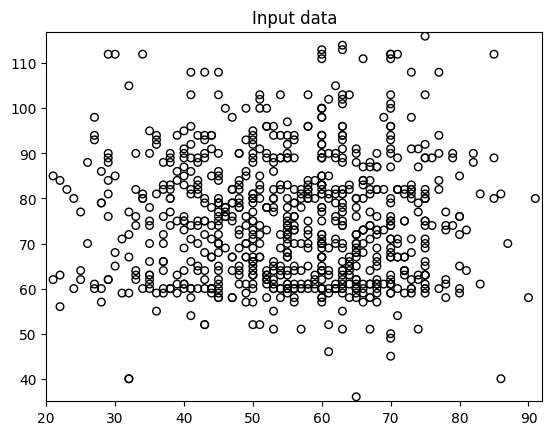

In [5]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# same as above: get the range of X and Y (short way)
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

#### Step 3: Apply K-Means Clustering + Determine Optimal K

I use two methods to choose the best number of clusters:
- Elbow Method (based on distortion)
- Silhouette Score (measures how well-separated the clusters are)

In [6]:
distortions = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    distortion = np.mean(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1))
    distortions.append(distortion)

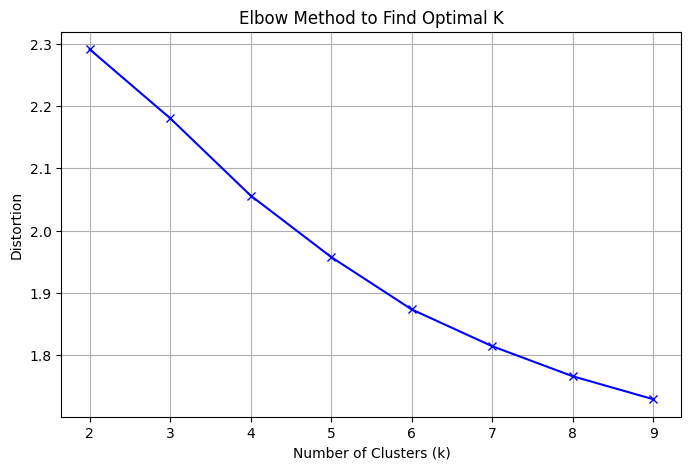

In [7]:
# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method to Find Optimal K')
plt.grid(True)
plt.show()

#### Step 4: Silhouette Score (to confirm best k)

In [8]:
silhouette_scores = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    score = silhouette_score(X_scaled, model.labels_)
    print(f"k = {k} | Silhouette Score: {score:.4f}")
    silhouette_scores.append(score)

k = 2 | Silhouette Score: 0.1525
k = 3 | Silhouette Score: 0.1669
k = 4 | Silhouette Score: 0.1701
k = 5 | Silhouette Score: 0.1770
k = 6 | Silhouette Score: 0.1627
k = 7 | Silhouette Score: 0.1585
k = 8 | Silhouette Score: 0.1542
k = 9 | Silhouette Score: 0.1457


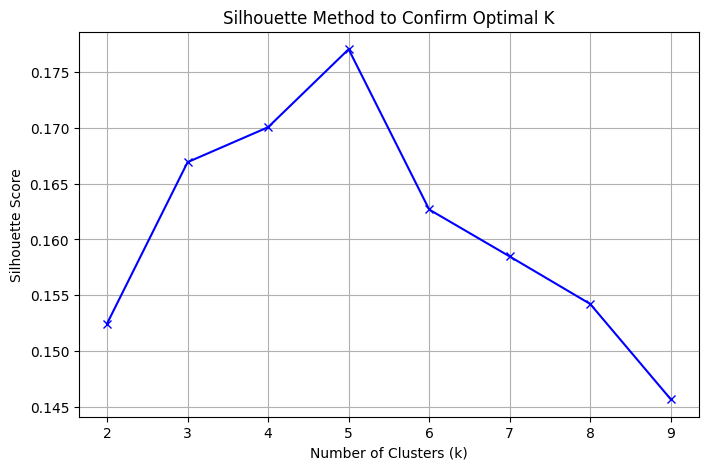

In [9]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Confirm Optimal K')
plt.grid(True)
plt.show()

Based on the Silhouette Score, the best number of clusters is clearly:
k = 5
This is where the silhouette score peaks (0.1770), indicating the best combination of tight intra-cluster cohesion and clear separation between clusters.

#### Step 5: Fit Final K-Means Model

In [10]:
# Fit the final KMeans model
kmeans_final = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
kmeans_final.fit(X_scaled)


KMeans(n_clusters=5, n_init=20, random_state=42)

In [11]:
# Predict cluster labels
cluster_labels = kmeans_final.predict(X_scaled)

# Optional: add labels back to original DataFrame for analysis
df['Cluster'] = cluster_labels

#### Step 6: Visualize Clusters vs. Actual Labels

- I use PCA (Principal Component Analysis) to reduce the 7-dimensional data to 2D so I can visualize it, and then compare clustering results (Cluster) with actual Result.
- This will generate side-by-side plots to visually compare how well the unsupervised clusters align with the real heart attack outcomes.

In [12]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Map binary labels to numeric for comparison
df['Result_binary'] = df['Result'].map({'negative': 0, 'positive': 1})

Text(0, 0.5, 'PCA 2')

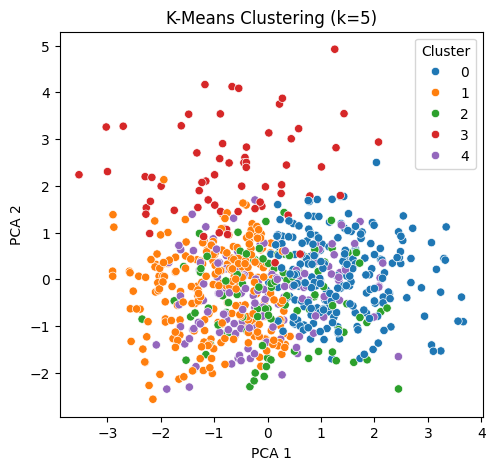

In [13]:
# Plot: Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering (k=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

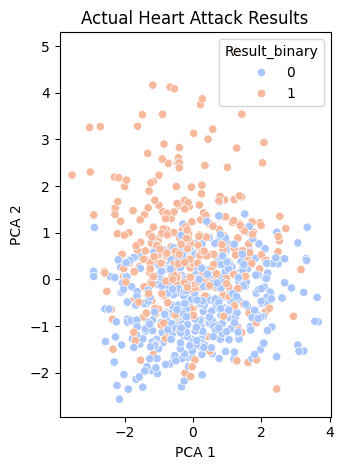

In [14]:
# Plot: Actual Heart Attack Labels
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Result_binary', palette='coolwarm')
plt.title('Actual Heart Attack Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

#### Split and Visualize Clusters (Simple Scatter Plot)

Cluster 0: (216, 2)


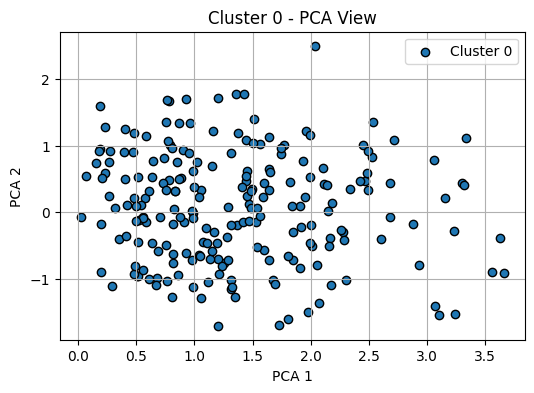

Cluster 1: (272, 2)


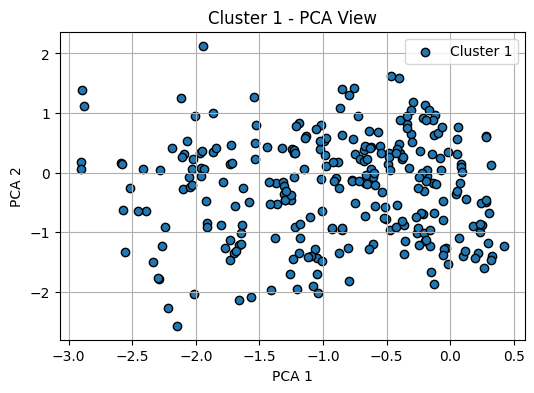

Cluster 2: (99, 2)


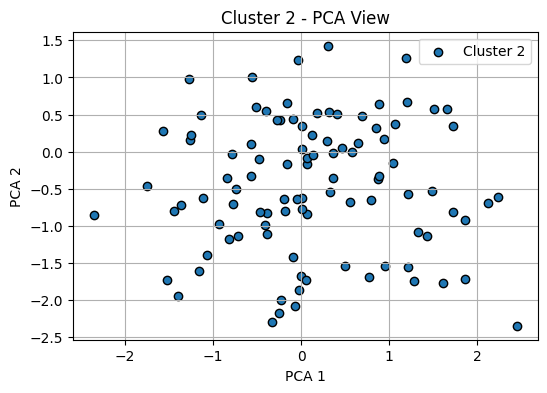

Cluster 3: (65, 2)


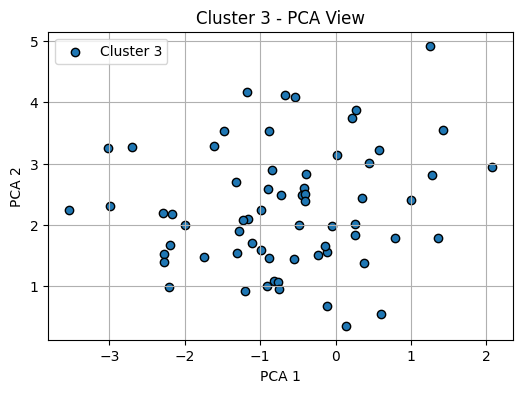

Cluster 4: (136, 2)


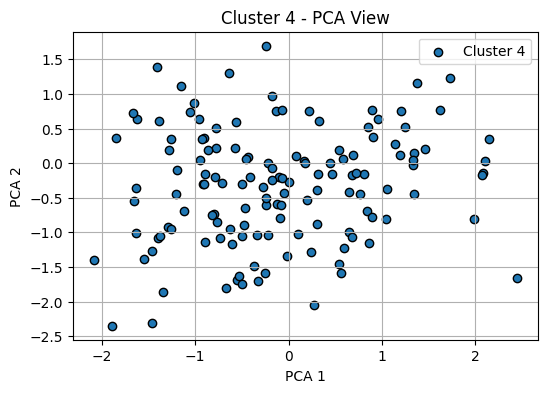

In [15]:
cluster_labels = kmeans_final.predict(X_scaled)
y_kmeans = cluster_labels
num_clusters = 5

for i in range(num_clusters):
    cluster = X_pca[y_kmeans == i]
    print(f"Cluster {i}: {cluster.shape}")
    plt.figure(figsize=(6, 4))
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}', edgecolors='k')
    plt.title(f'Cluster {i} - PCA View')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.legend()
    plt.show()


### t-SNE Cluster Visualization

Using **t-SNE**, I projected the high-dimensional clinical data into 2D to better visualize cluster separation.

- Clusters show **clear structure and separation**, better than PCA.
- Each point is a patient, colored by K-Means cluster.
- Confirms that K-Means found **meaningful subgroups** in the data.

This supports the presence of distinct clinical profiles related to heart attack risk.


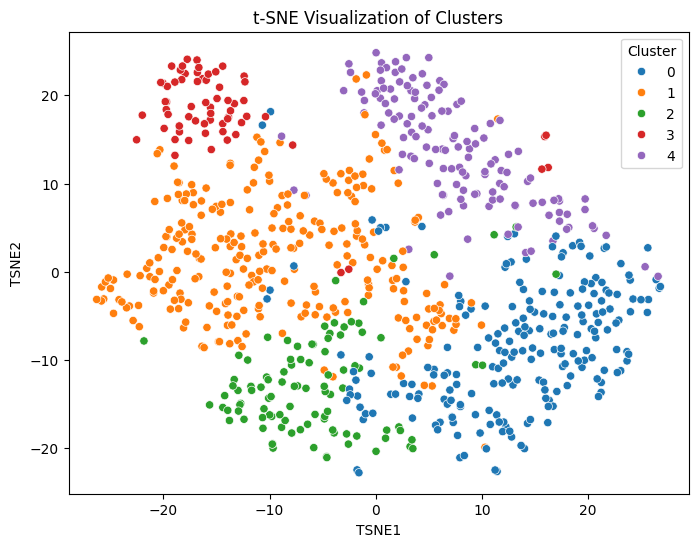

In [16]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X_scaled)
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10')
plt.title('t-SNE Visualization of Clusters')
plt.show()


#### Step 7: Analyze Cluster Composition vs. Heart Attack Outcomes

This allows me to evaluate whether certain clusters have a higher proportion of heart attack cases.

In [17]:
# Cross-tabulation of cluster vs actual Result
cluster_vs_result = pd.crosstab(df['Cluster'], df['Result_binary'], rownames=['Cluster'], colnames=['Heart Attack (1 = yes)'])
print(cluster_vs_result)

Heart Attack (1 = yes)    0   1
Cluster                        
0                       153  63
1                       183  89
2                        22  77
3                         0  65
4                        88  48


In [18]:
# View as row percentages
print(cluster_vs_result.div(cluster_vs_result.sum(axis=1), axis=0).round(2))

Heart Attack (1 = yes)     0     1
Cluster                           
0                       0.71  0.29
1                       0.67  0.33
2                       0.22  0.78
3                       0.00  1.00
4                       0.65  0.35


#### Step 8: Compare Feature Means per Cluster

In [19]:
# Compare average feature values per cluster
cluster_feature_means = df.groupby('Cluster')[features].mean().round(2)
display(cluster_feature_means)

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Cluster,,,,,,,
0,55.09,75.62,150.41,83.93,116.62,2.46,0.01
1,55.46,73.79,109.54,63.68,106.21,2.38,0.01
2,52.91,76.05,126.43,71.38,118.15,7.39,0.01
3,62.49,75.63,120.12,70.29,119.66,2.95,0.12
4,55.32,75.26,120.74,70.09,212.53,2.59,0.02


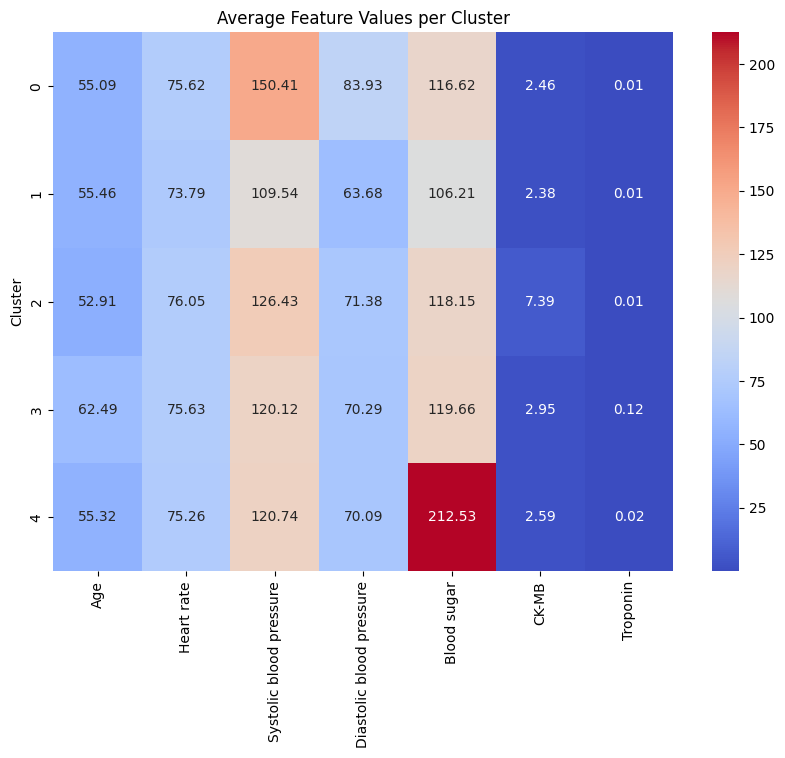

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(cluster_feature_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Feature Values per Cluster')
plt.show()

#### Step 8: Cluster Feature Profile & Hypothesis Validation

To better understand the internal composition of each cluster, we analyzed the **average values of key clinical features** (e.g., Troponin, CK-MB, Blood Sugar) across clusters using a heatmap.

#### Interpretation by Hypotheses:

| Hypothesis | Observation |
|-----------|-------------|
| **H1: Elevated troponin and CK-MB predict heart attack** | **Cluster 2** had the **highest CK-MB** (7.39) and **Cluster 3** had the **highest Troponin** (0.12). These clusters also had **high proportions of heart attack patients**, supporting H1. |
| **H2: High blood pressure and glucose increase risk** | **Cluster 0** had the **highest systolic BP**, and **Cluster 4** had the **highest blood sugar** (212.53). These clusters also had a notable share of heart attack cases, supporting H2. |
| **H3: Age correlates positively with heart attack** | **Cluster 3** had the **highest average age** (62.49) and 100% of its members had heart attacks — a strong indication supporting H3. |

#### Summary:
The K-Means clusters reveal **distinct physiological patterns** that align closely with your proposed hypotheses. This strengthens the argument that **unsupervised learning can uncover medically relevant patterns**, even without being explicitly told which patients had heart attacks.

#### Print Bondaries of Clusters

In [21]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
# Use PCA-transformed data range here
x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max()
y_min, y_max = X_pca[:, 1].min(), X_pca[:, 1].max()

x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [22]:
# Fit KMeans on PCA-reduced data (2D)
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_pca)

# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = kmeans_pca.predict(np.c_[xx, yy])
labels = labels.reshape(x_vals.shape)

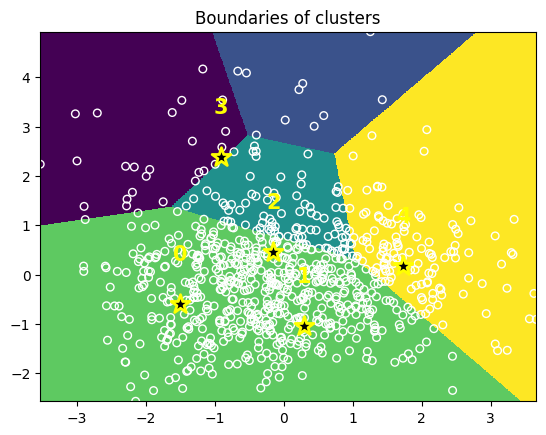

In [23]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
# Also plot PCA points, not original features
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', facecolors='none', edgecolors='white', s=30)

# plot the centroids
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center + [0.0, 1.0],
                 size=15, zorder=1, color='yellow', weight='bold',
                 horizontalalignment='center', verticalalignment='center')
plt.show()

#### t-SNE: Clusters vs. Actual Heart Attack Labels
- This plot overlays both K-Means clusters (color) and actual outcomes (shape).
- Circle (o) = No heart attack, Cross (X) = Heart attack.
- You can clearly see where clusters align well with outcomes — and where they mix.
- It offers a powerful validation for the clinical relevance of the unsupervised clusters.

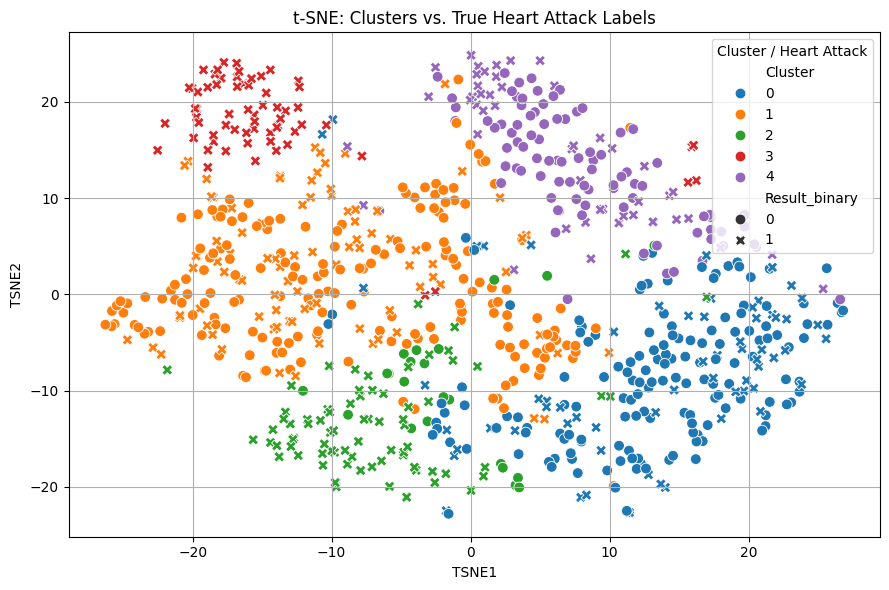

In [24]:
X_tsne = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X_scaled)
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

# Overlay: Cluster as color, Heart attack as shape
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x='TSNE1', y='TSNE2',
    hue='Cluster',              # Color by KMeans cluster
    style='Result_binary',      # Shape by true label
    palette='tab10',
    markers={0: 'o', 1: 'X'},    # 0 = negative, 1 = positive
    s=60
)
plt.title('t-SNE: Clusters vs. True Heart Attack Labels')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster / Heart Attack')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Validate the model

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

In [26]:
k = 5
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X)

array([4, 1, 0, 2, 4, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       3, 0, 0, 0, 1, 1, 2, 4, 3, 2, 0, 0, 0, 3, 2, 1, 0, 1, 1, 0, 3, 2,
       3, 0, 2, 2, 3, 0, 3, 1, 3, 1, 4, 2, 0, 4, 2, 2, 0, 3, 3, 3, 0, 4,
       2, 4, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 3, 2, 0, 1, 0, 2, 2, 1, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 0,
       2, 3, 4, 2, 2, 0, 2, 2, 2, 2, 1, 0, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 4, 4, 0, 2, 1, 2, 4, 4, 2, 4, 2, 1, 0, 3, 0, 1, 0, 0, 1,
       0, 0, 3, 1, 0, 4, 2, 2, 4, 2, 0, 4, 2, 0, 0, 0, 1, 0, 2, 3, 0, 1,
       3, 3, 2, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 4, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 3, 2, 3, 0, 3, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 4, 2, 2, 2, 2, 0, 0, 3, 0, 1, 3, 2, 4, 1, 0, 2, 4, 2,
       2, 1, 2, 1, 1, 0, 1, 0, 2, 4, 4, 1, 0, 0, 1, 1, 3, 1, 2, 2, 2, 0,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 4, 2, 2, 4, 1, 0, 1, 0, 2, 2, 3, 2, 2,
       2, 0, 0, 0, 2, 3, 2, 2, 3, 0, 0, 3, 3, 0, 0,

In [27]:
# Try different values of k (e.g., from 2 to 9)
for k in range(2, 10):
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit_predict(X)
    score = silhouette_score(X, model.labels_, metric='euclidean')
    print(f'k = {k} | Silhouette Score: {score:.3f}')

k = 2 | Silhouette Score: 0.481
k = 3 | Silhouette Score: 0.283
k = 4 | Silhouette Score: 0.256
k = 5 | Silhouette Score: 0.254
k = 6 | Silhouette Score: 0.229
k = 7 | Silhouette Score: 0.199
k = 8 | Silhouette Score: 0.203
k = 9 | Silhouette Score: 0.201


In [28]:
k = 2
model = KMeans(n_clusters=k, n_init=10, random_state=42)
model.fit_predict(X)

score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.481


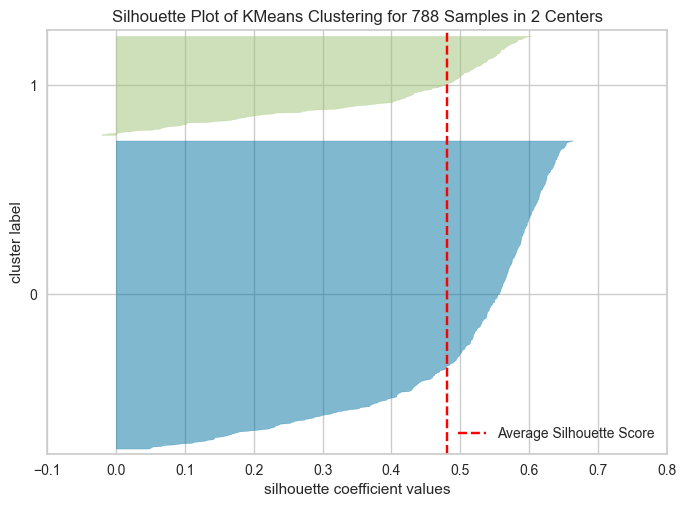

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 788 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()  

Interpretation: Each component of the figure represents one cluster with a horisontal bar chart of each cluster point. <br>
Clusters are seen almost equaly tick and long - similar. There is no cluster with a silhouette score lower than the average (the red line). <br>
The score is bigger than 0.5 - relatively good.


#### ✅ Interpretation:

- The highest Silhouette Score is for **k = 2**.
- As `k` increases, the Silhouette Score decreases — indicating that the **clusters become less distinct**.
- While `k = 2` offers **better mathematical separation**, higher `k` values (like `k = 5`) might still be useful for **clinical subgroup identification**.

#### 🔍 Recommendations:

- **Use `k = 2`** for simpler binary risk categorization (e.g., high vs low heart attack risk).
- **Use `k = 5`** if you aim to uncover **more nuanced clinical subtypes**.
- Visualize both `k = 2` and `k = 5` using PCA or t-SNE for comparison.


#### Implement the Model on New Data

In [ ]:
# New example patient data (replace with actual values)
# Format: [Age, Heart rate, Systolic BP, Diastolic BP, Blood sugar, CK-MB, Troponin]
new_patient_1 = [[65, 80, 140, 85, 160, 4.0, 0.05]]
new_patient_2 = [[70, 75, 150, 90, 200, 3.8, 0.10]]

# Scale new inputs using the same scaler used for training
scaled_1 = scaler.transform(new_patient_1)
scaled_2 = scaler.transform(new_patient_2)

# Predict clusters
pred_1 = kmeans_final.predict(scaled_1)
pred_2 = kmeans_final.predict(scaled_2)

print(f"New Patient 1 is in Cluster: {pred_1[0]}")
print(f"New Patient 2 is in Cluster: {pred_2[0]}")

# Optional: check if patient 2 is in a specific cluster (e.g., 3)
print("Patient 2 in cluster 3?", pred_2[0] == 3)


New Patient 1 is in Cluster: 0
New Patient 2 is in Cluster: 3
Patient 2 in cluster 3? True


### Predicting Clusters for New Patients

To validate the clustering model, I tested it on new, hypothetical patient data. Each patient's clinical measurements were **standardized using the same scaler**, and then the trained **K-Means model** was used to **predict their cluster assignment**.

- **Patient 1** was assigned to **Cluster 0**.
- **Patient 2** was assigned to **Cluster 3**, which (as shown earlier) had the **highest heart attack rate** and elevated **troponin levels** — suggesting **high risk**.

This confirms that the model can generalize its clustering to new clinical profiles.


#### Export

In [31]:
import joblib

joblib.dump(kmeans_final, '../outputs/models/kmeans_model.pkl')

['../outputs/models/kmeans_model.pkl']

cluster_feature_means.csv:

In [33]:
df.groupby('Cluster')[features].mean().to_csv('../outputs/models/cluster_feature_means.csv')

cluster_outcome_ratios.csv:

In [34]:
cluster_outcome_ratio = df.groupby('Cluster')['Result_binary'].mean().rename('HeartAttackRate')
cluster_outcome_ratio.to_frame().to_csv('../outputs/models/cluster_outcome_ratios.csv')

In [35]:
joblib.dump(scaler, '../outputs/models/scaler_kmeans.pkl')

['../outputs/models/scaler_kmeans.pkl']